In [1]:
# Importing modules 
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

from keras.utils import to_categorical
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Activation,Dense,Flatten
from keras.models import Sequential

from sklearn.model_selection import train_test_split

np.random.seed(1)

In [2]:
train_images = []       
train_labels = []
shape = (200,200)  
train_path = "C:\School\ECE539\Project\\train\\train"

for filename in os.listdir(train_path):
    if filename.split('.')[1] == 'jpg':
        imgResize = cv2.imread(os.path.join(train_path,filename))
        imgRotate = cv2.imread(os.path.join(train_path,filename))
        
        # Spliting file names and storing the labels for image in list
        train_labels.append(filename.split('_')[0])
        train_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        imgResize = cv2.resize(imgResize,shape)

        # Rotate all images
        imgRotate = cv2.resize(imgResize,shape)
        imgRotate = cv2.rotate(imgRotate, cv2.ROTATE_90_CLOCKWISE)
        
        train_images.append(imgRotate)
        train_images.append(imgResize)
        
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_images)


# Splitting Training data into train and validation dataset
X_train,X_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

In [3]:
test_images = []
test_labels = []
shape = (200,200)
test_path = "C:\School\ECE539\Project\\test\\test"

for filename in os.listdir(test_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        
        # Spliting file names and storing the labels for image in list
        test_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        test_images.append(img)
        
# Converting test_images to array
X_test = np.array(test_images)
y_test = pd.get_dummies(test_labels).values

In [4]:
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Val  : X=%s, y=%s' % (X_val.shape, y_val.shape))
print('Test : X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(360, 200, 200, 3), y=(360, 4)
Val  : X=(120, 200, 200, 3), y=(120, 4)
Test : X=(60, 200, 200, 3), y=(60, 4)


In [5]:
net = Sequential()
net.add(Conv2D(32, (3, 3), padding='same', input_shape=(200, 200, 3)))
net.add(BatchNormalization())
net.add(Activation('relu'))

net.add(MaxPooling2D((2, 2),strides=2))

net.add(Conv2D(30, (3, 3), padding='same'))
net.add(BatchNormalization())
net.add(Activation('relu'))

net.add(MaxPooling2D((2, 2),strides=2))

net.add(Conv2D(30, (3, 3), padding='same'))
net.add(BatchNormalization())
net.add(Activation('relu'))

net.add(Flatten())

net.add(Dense(20,activation='relu'))
net.add(Dense(15,activation='relu'))
net.add(Dense(4,activation = 'softmax'))

In [6]:
# Creating a Sequential model
# net= Sequential()
# net.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(200,200,3,)))
# net.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
# net.add(MaxPooling2D(2,2))
# net.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
# net.add(MaxPooling2D(2,2))
# net.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))

# net.add(Flatten())

# net.add(Dense(20,activation='relu'))
# net.add(Dense(15,activation='relu'))
# net.add(Dense(4,activation = 'softmax'))

# # net.compile(
# #               loss='categorical_crossentropy', 
# #               metrics=['acc'],
# #               optimizer='adam'
# #              )


In [7]:
net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 200, 200, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 30)      8670      
                                                                 
 batch_normalization_1 (Batc  (None, 100, 100, 30)     1

In [8]:
# history = net.fit(X_train,y_train,epochs=50,batch_size=50,validation_data=(X_val,y_val))

In [9]:
# # Hyperparameters
# lr = 0.1
# mom = 0.9 
ep = 50
bs = 50

In [10]:
# # compile and fit the keras model
from tensorflow.keras.optimizers import Adam
# # opt = SGD(learning_rate=lr, momentum=mom)
adam = Adam(learning_rate=0.001)
net.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')


# insert model check point call back
checkpoint_filepath = 'tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
# Model weights are saved at the end of every epoch, if it's the best seen
# so far.
history = net.fit(X_train, y_train, epochs=ep, batch_size=bs, validation_data=(X_val,y_val) , verbose=1, callbacks=[model_checkpoint_callback])
# The model weights (that are considered the best) are loaded into the model.
net.load_weights(checkpoint_filepath)

Epoch 1/50
8/8 [==============================] - 9s 1s/step - loss: 3.8216 - accuracy: 0.4000 - val_loss: 65.4883 - val_accuracy: 0.3417
Epoch 2/50
8/8 [==============================] - 8s 1s/step - loss: 1.4227 - accuracy: 0.6000 - val_loss: 9.0439 - val_accuracy: 0.3583
Epoch 3/50
8/8 [==============================] - 8s 1s/step - loss: 0.7986 - accuracy: 0.7083 - val_loss: 7.3633 - val_accuracy: 0.3417
Epoch 4/50
8/8 [==============================] - 8s 1s/step - loss: 0.4877 - accuracy: 0.8472 - val_loss: 7.0600 - val_accuracy: 0.3500
Epoch 5/50
8/8 [==============================] - 8s 1s/step - loss: 0.2591 - accuracy: 0.9167 - val_loss: 6.6352 - val_accuracy: 0.3750
Epoch 6/50
8/8 [==============================] - 8s 1s/step - loss: 0.2179 - accuracy: 0.9250 - val_loss: 8.5247 - val_accuracy: 0.3417
Epoch 7/50
8/8 [==============================] - 9s 1s/step - loss: 0.1808 - accuracy: 0.9472 - val_loss: 8.7953 - val_accuracy: 0.3500
Epoch 8/50
8/8 [========================

In [11]:
# You can visualize the results with a confusion matrix.
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_classified, y_true):
  # Compute confusion matrix
    c_mat = np.zeros((y_test.shape[1],y_test.shape[1]))
    for i in range(len(y_true)):
        c_mat[y_classified[i], y_true[i] ] += 1

    group_counts = ["{0:0.0f}".format(value) for value in c_mat.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in c_mat.flatten()/np.sum(c_mat)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(c_mat.shape[0], c_mat.shape[1])

    plt.figure(figsize=(12,10))
    sn.heatmap(c_mat, annot=labels, fmt='', cmap='rocket_r')
    plt.title("Confusion Matrix")
    plt.ylabel('Output Class')
    plt.xlabel('Target Class')

2/2 [==============================] - 0s 179ms/step - loss: 1.1706 - accuracy: 0.8500
Test loss: 1.1706058979034424
Test accuracy: 0.8500000238418579
2/2 [==============================] - 1s 172ms/step
Confusion matrix: 
 [[16  1  0  2]
 [ 1 16  0  1]
 [ 1  2  1  1]
 [ 0  0  0 18]]


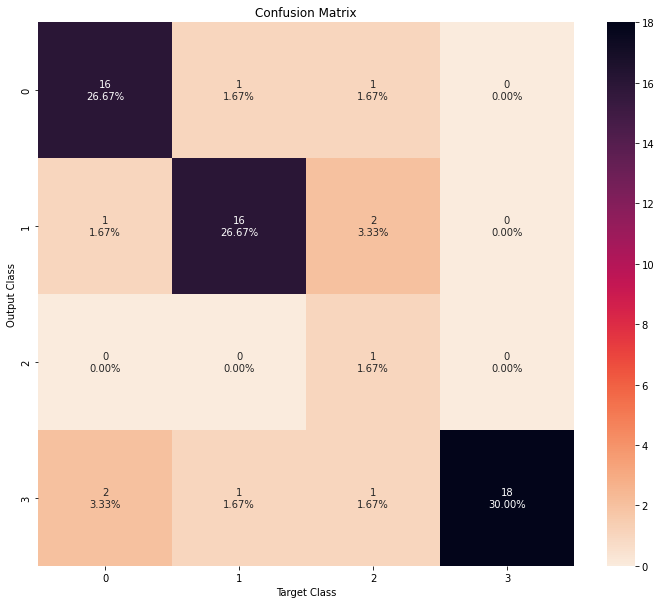

In [12]:
# Evaluate the trained model using keras built-in function
score = net.evaluate(X_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1]) 

y_classified = np.argmax(net.predict(X_test), axis=1)
y_true =  np.argmax(y_test, axis=1)
# Compute the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion matrix: \n", confusion_matrix(y_true, y_classified))

# plot confusion matrix
plot_confusion_matrix(y_classified, y_true)

In [13]:
# Compute the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion matrix: \n", confusion_matrix(y_true, y_classified))
print("P(classification) =", np.round(accuracy_score(y_true, y_classified), 3))

Confusion matrix: 
 [[16  1  0  2]
 [ 1 16  0  1]
 [ 1  2  1  1]
 [ 0  0  0 18]]
P(classification) = 0.85
